In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('ss_train_shock.csv')
data = data.drop(data.columns[0], axis=1)

In [63]:
data

,HHIDPN,AGE,WEIGHT,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,...,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SPEND_SS,SHOCK2
0,3020,66,4132.0,0,0,0,0,0,0,0,...,0,0,1,1,0,4,12,0,1.226103,0
1,3020,68,4210.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,18,0,1.207260,0
2,3020,70,4436.0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,15,0,3.296803,1
3,3020,72,4846.0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,13,0,1.087224,0
4,3020,74,4968.0,0,1,0,0,0,1,0,...,0,1,1,0,1,3,24,0,0.443857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,920275020,65,1206.0,-2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.071614,0
40931,920275020,67,1309.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,7,0,0.112669,0
40932,920275020,69,1515.0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,6,0,0.199811,0
40933,920275020,71,1543.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,5,0,1.273195,0


In [64]:
data.describe()

,HHIDPN,AGE,WEIGHT,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,...,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SPEND_SS,SHOCK2
count,4.093500e+04,40935.000000,38887.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,...,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000,40935.000000
mean,1.085264e+08,76.943667,3744.961838,0.098204,0.038622,0.022450,0.024649,0.015268,0.039795,0.020716,...,0.036472,0.237425,0.921510,0.100721,0.150898,2.263222,10.056089,11.563625,0.605297,0.064175
std,8.485821e+07,7.125103,2075.527612,0.857075,0.192695,0.148144,0.155054,0.122619,0.195479,0.142433,...,0.187465,0.425510,0.268945,0.300962,0.357954,8.319291,17.463616,84.132415,3.970107,0.245067
min,3.020000e+03,65.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000142,0.000000
25%,4.026001e+07,71.000000,2517.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.086990,0.000000
50%,7.683901e+07,76.000000,3484.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.204372,0.000000
75%,2.035370e+08,82.000000,4468.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.481123,0.000000
max,9.202750e+08,103.000000,28961.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,614.000000,900.000000,1795.000000,410.703059,1.000000


Simulation 1

In [11]:
def calculate_transition_probabilities(data):
    # Creating a pivot table to count transitions by age
    transitions = pd.crosstab(index=[data['AGE'], data['SHOCK2']], columns=data['SHOCK2'].shift(-1),
                              normalize='index').unstack().fillna(0)

    transitions.columns = ['prob_0_to_0', 'prob_0_to_1', 'prob_1_to_0', 'prob_1_to_1']
    
    return transitions

transition_probabilities = calculate_transition_probabilities(data)
transition_probabilities.head(10)

,prob_0_to_0,prob_0_to_1,prob_1_to_0,prob_1_to_1
AGE,,,,
65,0.923729,0.897561,0.076271,0.102439
66,0.936776,0.897507,0.063224,0.102493
67,0.959416,0.865942,0.040584,0.134058
68,0.973221,0.901316,0.026779,0.098684
69,0.971704,0.863636,0.028296,0.136364
70,0.977218,0.864000,0.022782,0.136000
71,0.985994,0.938053,0.014006,0.061947
72,0.990456,0.848214,0.009544,0.151786
73,0.966085,0.895833,0.033915,0.104167


In [13]:
def simulate_new_individuals(num_individuals, transitions, start_age=65, end_age=104):
    # Initialize a DataFrame to store simulation results with default initial state 0 (no shock)
    results = pd.DataFrame(0, index=range(num_individuals), columns=range(start_age, end_age+1))

    for age in range(start_age, end_age):
        if age in transitions.index:
            probs = transitions.loc[age].values.reshape(2, 2)
            probs = probs / probs.sum(axis=1, keepdims=True)
            
            for person in results.index:
                current_state = results.at[person, age]
                next_state = np.random.choice([0, 1], p=probs[int(current_state)])
                results.at[person, age + 1] = next_state
    
    return results

# Example: Simulate 100 new individuals
simulation_results_new_individuals = simulate_new_individuals(100, transition_probabilities)
simulation_results_new_individuals.head()

,65,66,67,68,69,70,71,72,73,74,...,95,96,97,98,99,100,101,102,103,104
0,0,1,1,0,1,1,1,0,1,1,...,1,1,1,0,0,1,0,1,0,0
1,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,0,0,0
2,0,1,0,1,1,1,1,1,1,0,...,1,1,1,0,0,0,1,0,0,0
3,0,0,0,1,0,1,1,1,1,0,...,1,1,0,0,0,0,1,0,0,0
4,0,1,1,1,1,0,1,1,1,0,...,1,1,1,0,1,1,0,1,0,0


In [11]:
shock_data = data[data['SHOCK2']==1]['SPEND_SS'].values
no_shock_data = data[data['SHOCK2']==0]['SPEND_SS'].values

(array([2221.,  170.,   58.,   43.,   33.,   24.,   17.,   12.,   11.,
          11.]),
 array([5.68702600e-03, 3.12236770e+00, 6.23904838e+00, 9.35572906e+00,
        1.24724097e+01, 1.55890904e+01, 1.87057711e+01, 2.18224518e+01,
        2.49391325e+01, 2.80558131e+01, 3.11724938e+01]),
 <BarContainer object of 10 artists>)

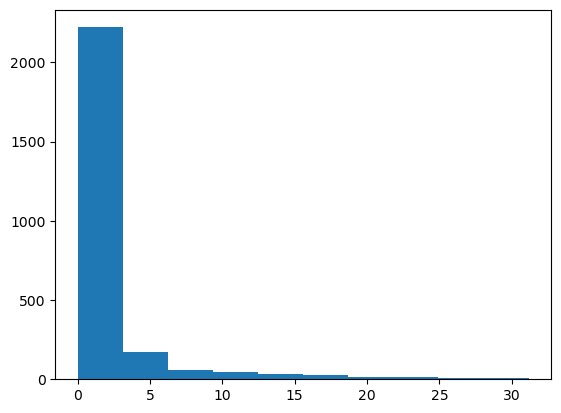

In [49]:
cutoff_index = int(len(shock_data) * 0.99)

sorted_data = np.sort(shock_data)
trimmed_data_shock = sorted_data[:cutoff_index]
plt.hist(x=trimmed_data_shock, bins = 10)

(array([28469.,  5592.,  1919.,   812.,   462.,   258.,   166.,   110.,
           71.,    65.]),
 array([1.42070000e-04, 4.35864987e-01, 8.71587904e-01, 1.30731082e+00,
        1.74303374e+00, 2.17875666e+00, 2.61447957e+00, 3.05020249e+00,
        3.48592541e+00, 3.92164832e+00, 4.35737124e+00]),
 <BarContainer object of 10 artists>)

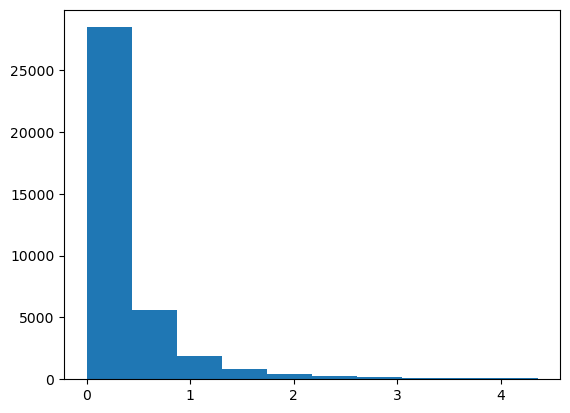

In [50]:
cutoff_index = int(len(no_shock_data) * 0.99)

sorted_data = np.sort(no_shock_data)
trimmed_data_no = sorted_data[:cutoff_index]
plt.hist(x=trimmed_data_no, bins = 10)

Shock spending Weibull parameters:
Shape (c): 0.6216710582695559, Scale (λ): 1.2411755050392888

No shock spending Weibull parameters:
Shape (c): 0.8526117977362249, Scale (λ): 0.3358153035333046


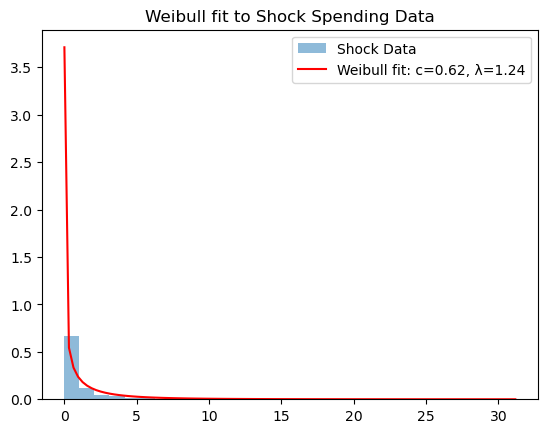

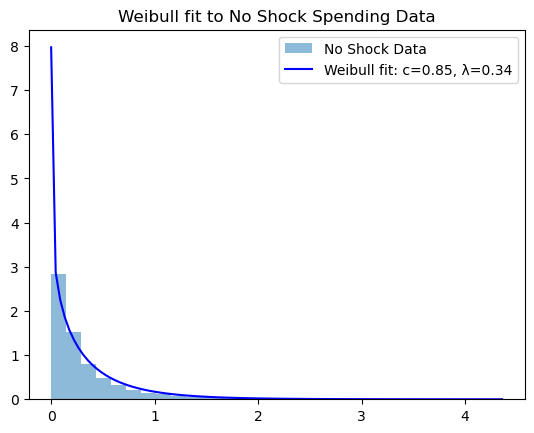

In [51]:
from scipy.stats import weibull_min
import numpy as np


# Fit the Weibull distribution to the shock spending data
shock_c, shock_loc, shock_scale = weibull_min.fit(trimmed_data_shock, floc=0)
# Fit the Weibull distribution to the no shock spending data
no_shock_c, no_shock_loc, no_shock_scale = weibull_min.fit(trimmed_data_no, floc=0)

print("Shock spending Weibull parameters:")
print(f"Shape (c): {shock_c}, Scale (λ): {shock_scale}")

print("\nNo shock spending Weibull parameters:")
print(f"Shape (c): {no_shock_c}, Scale (λ): {no_shock_scale}")

import matplotlib.pyplot as plt

# Plot for shock spending
x_shock = np.linspace(min(trimmed_data_shock), max(trimmed_data_shock), 100)
y_shock = weibull_min.pdf(x_shock, shock_c, shock_loc, shock_scale)

plt.hist(trimmed_data_shock, bins=30, density=True, alpha=0.5, label='Shock Data')
plt.plot(x_shock, y_shock, 'r-', label=f'Weibull fit: c={shock_c:.2f}, λ={shock_scale:.2f}')
plt.title('Weibull fit to Shock Spending Data')
plt.legend()
plt.show()

# Plot for no shock spending
x_no_shock = np.linspace(min(trimmed_data_no), max(trimmed_data_no), 100)
y_no_shock = weibull_min.pdf(x_no_shock, no_shock_c, no_shock_loc, no_shock_scale)

plt.hist(trimmed_data_no, bins=30, density=True, alpha=0.5, label='No Shock Data')
plt.plot(x_no_shock, y_no_shock, 'b-', label=f'Weibull fit: c={no_shock_c:.2f}, λ={no_shock_scale:.2f}')
plt.title('Weibull fit to No Shock Spending Data')
plt.legend()
plt.show()

In [56]:
shock_params = [shock_c, shock_scale] 
no_shock_params = [no_shock_c, no_shock_scale]

def simulate_spending(num_individuals, transitions, start_age, end_age, shock_params, no_shock_params):
    states = pd.DataFrame(0, index=range(num_individuals), columns=range(start_age, end_age + 1))
    spending = pd.DataFrame(0.0, index=range(num_individuals), columns=range(start_age, end_age + 1))
    
    for age in range(start_age, end_age):
        if age in transitions.index:
            probs = transitions.loc[age].values.reshape(2, 2)
            probs = probs / probs.sum(axis=1, keepdims=True)
            
            # For each individual, simulate the next state based on current state
            for person in range(num_individuals):
                current_state = states.at[person, age]
                # Use the transition probabilities to determine the next state
                next_state = np.random.choice([0, 1], p=probs[int(current_state)])
                states.at[person, age + 1] = next_state
                
                # Simulate spending from the Weibull distribution based on the current state
                # and assign it to the next age
                if current_state == 1:  # If the current state is 'shock'
                    spending.at[person, age + 1] = weibull_min.rvs(shock_params[0], loc=0, scale=shock_params[1])
                else:  # If the current state is 'no shock'
                    spending.at[person, age + 1] = weibull_min.rvs(no_shock_params[0], loc=0, scale=no_shock_params[1])
    
    return spending

In [64]:
simulation_results = simulate_spending(10000, transition_probabilities, 65, 104, shock_params, no_shock_params)
simulation_results

,65,66,67,68,69,70,71,72,73,74,...,95,96,97,98,99,100,101,102,103,104
0,0.0,0.194867,3.253320,2.618982,0.770278,5.234294,0.046619,0.288416,2.096229,1.772811,...,0.092105,0.032904,5.828843,2.388131,1.511964,0.666690,0.098890,0.524360,0.051745,0.429292
1,0.0,0.320994,3.378805,0.232858,0.599018,8.490514,2.081179,2.883314,2.202843,0.230389,...,0.018828,0.246685,0.016995,0.036475,0.371678,0.640008,1.789923,0.242724,0.020187,0.189724
2,0.0,0.272565,7.686866,0.260877,0.433075,2.540379,0.076238,2.414032,5.679457,0.279476,...,0.005298,0.483344,0.362188,0.255076,0.258396,0.342097,4.054087,0.086359,1.041095,0.714506
3,0.0,0.846653,0.033471,0.741841,0.403247,0.408824,1.042061,0.013176,0.130729,1.090268,...,2.407703,0.031444,0.013316,0.325769,0.007946,2.413030,0.347206,0.130357,0.769684,0.132098
4,0.0,0.118725,0.125854,0.011909,7.020977,0.419786,0.561207,4.384267,0.326232,0.774987,...,0.893866,0.002516,0.979032,0.542401,0.205516,0.371700,0.103803,1.077145,0.365361,0.508574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.130812,0.060088,2.734494,0.059337,0.404925,1.862579,0.773663,0.054470,0.268482,...,11.599301,11.395662,8.221733,0.534745,0.207421,0.052815,0.571683,0.281068,0.362364,0.406802
9996,0.0,0.222763,0.937457,1.303510,0.188519,0.817810,0.077821,0.252517,0.619130,0.685441,...,0.330195,0.184514,0.036675,0.016709,0.126144,0.411100,0.062218,1.855944,0.555419,0.424887
9997,0.0,0.271540,1.565634,0.099416,2.916345,0.001060,1.802244,0.984284,1.138259,0.012290,...,0.840114,1.558543,13.670258,3.098922,0.187862,1.661667,0.437262,0.252125,0.839157,0.543542
9998,0.0,1.066075,0.034626,0.167622,0.087562,0.126664,1.666170,0.572542,0.902052,0.026100,...,4.505980,0.328823,0.180787,0.513821,0.609288,0.083431,0.068129,1.353025,0.865361,0.465497


In [66]:
def plot_aggregate_average_spending(spending_simulation_results):
    average_spending = spending_simulation_results.mean()

    plt.figure(figsize=(10, 6))
    average_spending.plot(kind='line', color='blue', marker='o')
    plt.title('Aggregate Average Spending Across All Simulations at Each Age')
    plt.xlabel('Age')
    plt.ylabel('Average Spending')
    plt.grid(True)
    plt.show()

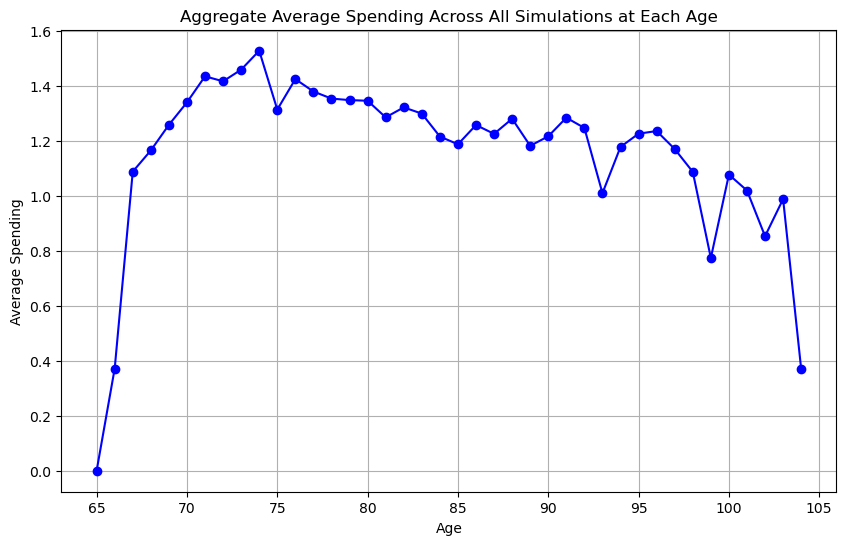

In [67]:
plot_aggregate_average_spending(simulation_results)

Simulation 2

In [9]:
data.columns

Index(['HHIDPN', 'AGE', 'WEIGHT', 'HEALTH_CHANGE', 'HBP', 'DIABETES', 'CANCER',
       'LUNGS', 'HEART_ATTACK', 'STROKE', 'PSYCH', 'ARTHRITIS', 'OUT_PT',
       'DRUGS', 'HOME_CARE', 'SPECIAL_FAC', 'HOSPITAL', 'DOCTOR',
       'NURSING_HOME', 'SPEND_SS', 'SHOCK2'],
      dtype='object')

2024-04-24 17:08:29.566 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=52.884129)
2024-04-24 17:08:29.572 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=56.608934)
2024-04-24 17:08:29.582 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=55.832244)
2024-04-24 17:08:29.619 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=54.993616)
2024-04-24 17:08:29.630 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=55.776412)


Analyzing HEALTH_CHANGE


2024-04-24 17:08:29.832 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=57.394744)
2024-04-24 17:08:29.978 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=52.890138)
2024-04-24 17:08:30.014 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=52.901787)
2024-04-24 17:08:30.129 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=53.615159)
2024-04-24 17:08:30.171 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=52.887907)
2024-04-24 17:08:30.268 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=8954.862332)
2024-04-24 17:08:30.269 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=6163.782083)
2024-04-24 17:08:30.274 | INFO     | fitter.fitter:_fit_single_distribution:337 - 

{'norm': {'loc': 0.09820447050201539, 'scale': 0.857064821460843}}
Analyzing HBP


2024-04-24 17:08:30.599 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9257.389377)
2024-04-24 17:08:30.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=6497.047558)
2024-04-24 17:08:30.766 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8206.623124)
2024-04-24 17:08:30.866 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=9257.389377)
2024-04-24 17:08:30.894 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9201.454647)
2024-04-24 17:08:30.958 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=7589.00033)
2024-04-24 17:08:31.044 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=4746.383359)
2024-04-24 17:08:31.045 | INFO     | fitter.fitter:_fit_single_distri

{'expon': {'loc': 0.0, 'scale': 0.038622205936240384}}
Analyzing DIABETES


2024-04-24 17:08:31.384 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9561.075734)
2024-04-24 17:08:31.515 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=6843.789978)
2024-04-24 17:08:31.545 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8272.761739)
2024-04-24 17:08:31.638 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9505.135265)
2024-04-24 17:08:31.706 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=9561.075734)
2024-04-24 17:08:31.742 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=8734.267423)
2024-04-24 17:08:31.819 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=5032.094822)
2024-04-24 17:08:31.824 | INFO     | fitter.fitter:_fit_single_distr

{'expon': {'loc': 0.0, 'scale': 0.022450225967998047}}
Analyzing CANCER


2024-04-24 17:08:32.145 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9519.17463)
2024-04-24 17:08:32.275 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=6737.660229)
2024-04-24 17:08:32.300 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8274.555891)
2024-04-24 17:08:32.404 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9463.234927)
2024-04-24 17:08:32.453 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=9519.17463)
2024-04-24 17:08:32.500 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=8694.083277)
2024-04-24 17:08:32.578 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=9191.885206)
2024-04-24 17:08:32.580 | INFO     | fitter.fitter:_fit_single_distribu

{'expon': {'loc': 0.0, 'scale': 0.02464883351655063}}
Analyzing LUNGS


2024-04-24 17:08:32.891 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9699.300143)
2024-04-24 17:08:33.019 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7380.150602)
2024-04-24 17:08:33.045 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8217.09527)
2024-04-24 17:08:33.152 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9643.357204)
2024-04-24 17:08:33.226 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=7450.860263)
2024-04-24 17:08:33.257 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=9699.300143)
2024-04-24 17:08:33.334 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=6223.101611)
2024-04-24 17:08:33.340 | INFO     | fitter.fitter:_fit_single_distri

{'expon': {'loc': 0.0, 'scale': 0.015268107976059606}}
Analyzing HEART_ATTACK


2024-04-24 17:08:33.662 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9235.776584)
2024-04-24 17:08:33.810 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=6501.753519)
2024-04-24 17:08:33.841 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8197.02994)
2024-04-24 17:08:33.968 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9179.84228)
2024-04-24 17:08:34.060 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=7578.623655)
2024-04-24 17:08:34.102 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=8026.235755)
2024-04-24 17:08:34.176 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=4489.601445)
2024-04-24 17:08:34.181 | INFO     | fitter.fitter:_fit_single_distrib

{'expon': {'loc': 0.0, 'scale': 0.03979479662880176}}
Analyzing STROKE


2024-04-24 17:08:34.491 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9594.267484)
2024-04-24 17:08:34.646 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=6945.001684)
2024-04-24 17:08:34.667 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8267.354298)
2024-04-24 17:08:34.776 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9538.326414)
2024-04-24 17:08:34.787 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=9594.267484)
2024-04-24 17:08:34.863 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=8766.020892)
2024-04-24 17:08:34.951 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=9566.674422)
2024-04-24 17:08:34.956 | INFO     | fitter.fitter:_fit_single_dis

{'expon': {'loc': 0.0, 'scale': 0.020715768901917675}}
Analyzing PSYCH


2024-04-24 17:08:35.249 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9666.674422)
2024-04-24 17:08:35.374 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7224.728231)
2024-04-24 17:08:35.401 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8239.384365)
2024-04-24 17:08:35.513 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9610.732058)
2024-04-24 17:08:35.562 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=9666.674422)
2024-04-24 17:08:35.591 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=7138.169007)
2024-04-24 17:08:35.675 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=9197.155675)
2024-04-24 17:08:35.677 | INFO     | fitter.fitter:_fit_single_dis

{'expon': {'loc': 0.0, 'scale': 0.016953707096616588}}
Analyzing ARTHRITIS


2024-04-24 17:08:36.005 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=9297.155675)
2024-04-24 17:08:36.139 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=6496.772529)
2024-04-24 17:08:36.168 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8223.077629)
2024-04-24 17:08:36.263 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=9241.220167)
2024-04-24 17:08:36.308 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=9297.155675)
2024-04-24 17:08:36.357 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=7607.067116)
2024-04-24 17:08:36.436 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=5957.383763)
2024-04-24 17:08:36.439 | INFO     | fitter.fitter:_fit_single_distr

{'expon': {'loc': 0.0, 'scale': 0.03647245633321119}}
Analyzing OUT_PT


2024-04-24 17:08:36.757 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=6378.910656)
2024-04-24 17:08:36.918 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4466.363085)
2024-04-24 17:08:36.978 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=5665.020444)
2024-04-24 17:08:37.084 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=6323.073543)
2024-04-24 17:08:37.174 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=5753.347298)
2024-04-24 17:08:37.187 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=5005.503765)
2024-04-24 17:08:37.273 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=8516.594537)
2024-04-24 17:08:37.274 | INFO     | fitter.fitter:_fit_single_distr

{'gamma': {'a': 0.10317429520550508, 'loc': -3.309511414249768e-29, 'scale': 0.2557503007678845}}
Analyzing DRUGS


2024-04-24 17:08:37.485 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=8553.408721)
2024-04-24 17:08:37.757 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=8384.289041)
2024-04-24 17:08:37.760 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=8510.703857)
2024-04-24 17:08:37.807 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=8512.070779)
2024-04-24 17:08:38.032 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=8360.235627)
2024-04-24 17:08:38.112 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=7618.076438)
2024-04-24 17:08:38.183 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=6984.868849)
2024-04-24 17:08:38.188 | INFO     | fitter.fitter:_fit_single_distr

{'exponpow': {'b': 561954601.1920443, 'loc': -43880283.36414032, 'scale': 43880284.37834607}}
Analyzing HOME_CARE


2024-04-24 17:08:38.502 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=8188.479912)
2024-04-24 17:08:38.670 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7522.466158)
2024-04-24 17:08:38.705 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=7378.030484)
2024-04-24 17:08:38.813 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=8132.569722)
2024-04-24 17:08:38.871 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=8188.479912)
2024-04-24 17:08:38.919 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=5758.300842)
2024-04-24 17:08:39.137 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=7337.447413)
2024-04-24 17:08:39.144 | INFO     | fitter.fitter:_fit_single_dis

{'exponpow': {'b': 0.143362838630129, 'loc': -3.560880996981842e-30, 'scale': 0.019082625975297952}}
Analyzing SPECIAL_FAC


2024-04-24 17:08:39.456 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=7437.447413)
2024-04-24 17:08:39.629 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5663.191213)
2024-04-24 17:08:39.664 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=6757.428262)
2024-04-24 17:08:39.765 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=7437.447413)
2024-04-24 17:08:39.791 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=7381.560508)
2024-04-24 17:08:39.871 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=5429.93779)
2024-04-24 17:08:39.945 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.001137)
2024-04-24 17:08:39.952 | INFO     | fitter.fitter:_fit_single_distribut

{'exponpow': {'b': 0.19112323551946603, 'loc': -1.162108503883528e-27, 'scale': 0.8517395039757447}}
Analyzing HOSPITAL


2024-04-24 17:08:40.274 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.021799)
2024-04-24 17:08:40.458 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.021626)
2024-04-24 17:08:40.500 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.007526)
2024-04-24 17:08:40.580 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.021605)
2024-04-24 17:08:40.690 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.021799)
2024-04-24 17:08:40.744 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.009844)
2024-04-24 17:08:40.820 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=6e-05)
2024-04-24 17:08:40.825 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted nor

{'expon': {'loc': 0.0, 'scale': 2.2632221815072677}}
Analyzing DOCTOR


2024-04-24 17:08:41.155 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=2.5e-05)
2024-04-24 17:08:41.328 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.005669)
2024-04-24 17:08:41.359 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.001024)
2024-04-24 17:08:41.381 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.005192)
2024-04-24 17:08:41.699 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.001574)
2024-04-24 17:08:41.777 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.002452)
2024-04-24 17:08:41.779 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.000251)
2024-04-24 17:08:41.781 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uni

{'lognorm': {'s': 0.868974104500253, 'loc': -1.34148344386801, 'scale': 7.659471058498764}}
Analyzing NURSING_HOME


2024-04-24 17:08:42.090 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.002861)
2024-04-24 17:08:42.225 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.002223)
2024-04-24 17:08:42.254 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.001999)
2024-04-24 17:08:42.346 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.002844)
2024-04-24 17:08:42.449 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.002861)
2024-04-24 17:08:42.454 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.002028)


{'expon': {'loc': 0.0, 'scale': 11.563625259557835}}


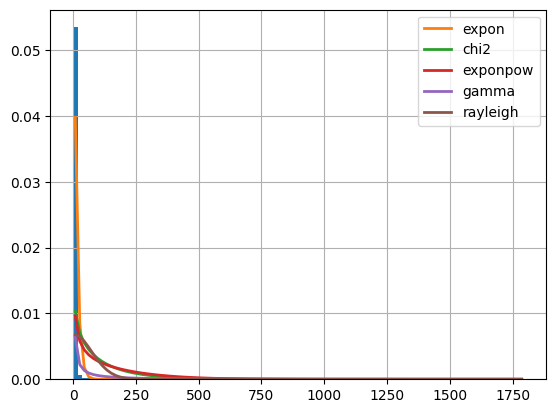

In [65]:
def find_best_distribution(data, variable_name):

    variable_data = data[variable_name].dropna()
    f = Fitter(variable_data, distributions=get_common_distributions())
    f.fit()
    f.summary()
    return f

variable_names = ['HEALTH_CHANGE', 'HBP', 'DIABETES', 'CANCER',
       'LUNGS', 'HEART_ATTACK', 'STROKE', 'PSYCH', 'ARTHRITIS', 'OUT_PT',
       'DRUGS', 'HOME_CARE', 'SPECIAL_FAC', 'HOSPITAL', 'DOCTOR',
       'NURSING_HOME']

distribution_params = {}
for variable in variable_names:
    print(f"Analyzing {variable}")
    dist = find_best_distribution(data, variable)
    distribution_params[variable] = dist.get_best(method='sumsquare_error')
    print(dist.get_best(method='sumsquare_error'))

2024-04-24 17:08:42.674 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.035888)
2024-04-24 17:08:42.678 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.002729)
2024-04-24 17:08:42.682 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.045052)
2024-04-24 17:08:42.698 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.032362)
2024-04-24 17:08:42.761 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.032567)
2024-04-24 17:08:42.766 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.031572)
2024-04-24 17:08:42.907 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.045022)
2024-04-24 17:08:42.934 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted 

{'expon': {'loc': 0.005687026, 'scale': 2.8801388964453754}}


2024-04-24 17:08:43.381 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.025666)
2024-04-24 17:08:43.472 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3.592358)
2024-04-24 17:08:43.498 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1.570043)
2024-04-24 17:08:43.857 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1.948099)


{'lognorm': {'s': 1.2657396612636225, 'loc': -0.003657469198665616, 'scale': 0.19626317630869033}}


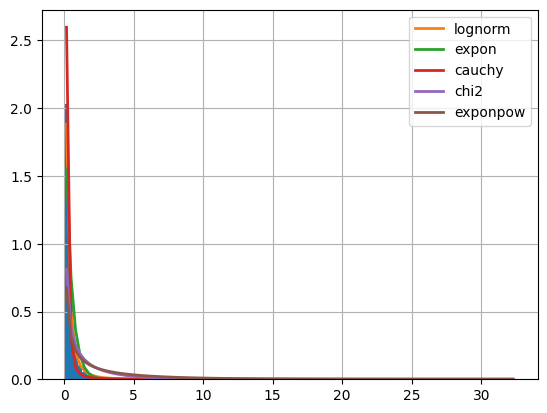

In [66]:
shock_data = data[data['SHOCK2']==1]
no_shock_data = data[data['SHOCK2']==0]
variable_names = ['SPEND_SS']
spending = [shock_data, no_shock_data]
spending_results = {}
for i in range(2):
    spending_results[i] = find_best_distribution(spending[i], 'SPEND_SS')
    print(spending_results[i].get_best(method='sumsquare_error'))

In [76]:
from sklearn.linear_model import LogisticRegression
def modelling(data, predictors, response):
    # Create a lagged version of 'SHOCK2' to use as the target variable
    data['response_next'] = data.groupby('HHIDPN')[response].shift(-1)
    
    
    data_clean = data.dropna(subset=predictors + ['response_next'])
    
    X = data_clean[predictors]
    y = data_clean['response_next']
    
    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(X, y)
    
    return model

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data_test = pd.read_csv('ss_test_shock.csv')
def modelling_linear(data, predictors, response):
    data['response_next'] = data.groupby('HHIDPN')[response].shift(-1)
    data_test['response_next'] = data_test.groupby('HHIDPN')[response].shift(-1)
    data_clean = data.dropna(subset=predictors + ['response_next'])
    
    X_train = data_clean[predictors]
    y_train = data_clean['response_next']
    X_test = data_test[predictors]
    y_test = data_test['response_next']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred

    return model, residuals

In [90]:
# def modelling_linear(data, predictors, response):
#     data['response_next'] = data.groupby('HHIDPN')[response].shift(-1)
#     data_clean = data.dropna(subset=predictors + ['response_next'])
    
#     X = data_clean[predictors]
#     y = data_clean['response_next']
    
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('model', LinearRegression())
#     ])
    
#     pipeline.fit(X, y)
    
#     return pipeline

In [77]:
predictors = ['AGE', 'HEALTH_CHANGE', 'HBP', 'STROKE', 'ARTHRITIS', 'DRUGS', 'SPECIAL_FAC', 'HOSPITAL', 'DOCTOR', 'NURSING_HOME']
response = 'SHOCK2'
shock_model = modelling(data, predictors, response)

In [121]:
yes_pred = ['AGE','PSYCH', 'DRUGS', 'HOME_CARE', 'HOSPITAL', 'DOCTOR', 'NURSING_HOME']
spend_response = 'SPEND_SS'
yes_model, yes_resid = modelling_linear(data, yes_pred, spend_response)

In [122]:
no_pred = ['AGE','HEALTH_CHANGE', 'DRUGS', 'HOME_CARE', 'DOCTOR', 'NURSING_HOME']
no_model, no_resid = modelling_linear(data, no_pred, spend_response)

In [107]:
from scipy import stats

def simulate_individual_data(num_individuals, start_age, end_age, distribution_params):
    simulated_complete_data = pd.DataFrame()

    # Simulate data for each individual
    for person_id in range(1, num_individuals + 1):
        # Initialize a DataFrame for the current individual's data across the specified age range
        individual_data = pd.DataFrame({
            'AGE': range(start_age, end_age + 1),
            'HHIDPN': person_id  # Assign the unique person ID to each row
        })

        # Simulate the data for each variable according to the distribution parameters
        for variable, params_dict in distribution_params.items():
            dist_name, params = next(iter(params_dict.items()))  # Get the distribution and its parameters
            dist = getattr(stats, dist_name)  
            individual_data[variable] = dist.rvs(size=end_age - start_age + 1, **params)
        
        simulated_complete_data = pd.concat([simulated_complete_data, individual_data], ignore_index=True)

    return simulated_complete_data

# Example usage
num_individuals = 10000

stacked_simulation = simulate_individual_data(num_individuals, 65, 90, distribution_params)
stacked_simulation

,AGE,HHIDPN,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME
0,65,1,1.259270,0.096403,0.014834,0.010060,0.012763,0.026260,0.035919,0.009605,0.003527,3.003032e-04,0.999969,1.102629e-01,2.151602e-01,0.649378,12.285009,31.209481
1,66,1,1.789933,0.015553,0.048973,0.006805,0.011516,0.014290,0.004554,0.004782,0.054309,3.630152e-04,0.926903,3.586824e-05,1.078235e-01,7.069458,5.746425,6.572694
2,67,1,-0.748579,0.094260,0.013460,0.011139,0.003901,0.001955,0.005797,0.010475,0.031805,6.206608e-07,1.020580,1.714228e-01,1.900134e-05,0.281702,0.886020,15.514514
3,68,1,-0.829285,0.004258,0.034380,0.012297,0.000064,0.009402,0.050014,0.014391,0.040477,8.765797e-02,1.048062,4.907983e-02,4.754530e-03,0.649301,3.526252,10.265387
4,69,1,0.315872,0.020607,0.012733,0.025186,0.013597,0.094973,0.043371,0.003465,0.028343,2.410593e-08,0.984297,1.087757e-02,4.938408e-02,4.885654,13.767671,6.528035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,86,10000,1.161686,0.018669,0.006016,0.029027,0.039724,0.086915,0.033410,0.001796,0.051935,4.752510e-13,1.043855,3.717665e-06,8.197283e-04,1.414387,4.671314,5.077167
259996,87,10000,0.088339,0.002422,0.004678,0.002058,0.005620,0.041479,0.009838,0.009168,0.007701,1.007963e-10,0.925764,1.085903e-06,7.262147e-03,0.073158,10.572020,0.203015
259997,88,10000,0.208741,0.003385,0.035667,0.051494,0.001858,0.047643,0.005017,0.027507,0.023714,1.826675e-08,0.917167,6.889300e-11,2.245976e+01,0.107691,21.925510,2.806915
259998,89,10000,-0.251251,0.123042,0.056826,0.009865,0.001475,0.013417,0.028386,0.049983,0.038020,9.812279e-15,1.041729,8.925679e-11,1.785150e-01,1.325385,17.129959,2.259089


In [108]:
def add_shock_predictions(simulated_data, shock_model, predictors):
    
    predicted_shocks = shock_model.predict(simulated_data[predictors])
    
    simulated_data['SHOCK2'] = predicted_shocks
    
    return simulated_data

simulated_data_with_shock = add_shock_predictions(stacked_simulation, shock_model, predictors)

simulated_data_with_shock

,AGE,HHIDPN,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SHOCK2
0,65,1,1.259270,0.096403,0.014834,0.010060,0.012763,0.026260,0.035919,0.009605,0.003527,3.003032e-04,0.999969,1.102629e-01,2.151602e-01,0.649378,12.285009,31.209481,1.0
1,66,1,1.789933,0.015553,0.048973,0.006805,0.011516,0.014290,0.004554,0.004782,0.054309,3.630152e-04,0.926903,3.586824e-05,1.078235e-01,7.069458,5.746425,6.572694,1.0
2,67,1,-0.748579,0.094260,0.013460,0.011139,0.003901,0.001955,0.005797,0.010475,0.031805,6.206608e-07,1.020580,1.714228e-01,1.900134e-05,0.281702,0.886020,15.514514,1.0
3,68,1,-0.829285,0.004258,0.034380,0.012297,0.000064,0.009402,0.050014,0.014391,0.040477,8.765797e-02,1.048062,4.907983e-02,4.754530e-03,0.649301,3.526252,10.265387,1.0
4,69,1,0.315872,0.020607,0.012733,0.025186,0.013597,0.094973,0.043371,0.003465,0.028343,2.410593e-08,0.984297,1.087757e-02,4.938408e-02,4.885654,13.767671,6.528035,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,86,10000,1.161686,0.018669,0.006016,0.029027,0.039724,0.086915,0.033410,0.001796,0.051935,4.752510e-13,1.043855,3.717665e-06,8.197283e-04,1.414387,4.671314,5.077167,0.0
259996,87,10000,0.088339,0.002422,0.004678,0.002058,0.005620,0.041479,0.009838,0.009168,0.007701,1.007963e-10,0.925764,1.085903e-06,7.262147e-03,0.073158,10.572020,0.203015,0.0
259997,88,10000,0.208741,0.003385,0.035667,0.051494,0.001858,0.047643,0.005017,0.027507,0.023714,1.826675e-08,0.917167,6.889300e-11,2.245976e+01,0.107691,21.925510,2.806915,0.0
259998,89,10000,-0.251251,0.123042,0.056826,0.009865,0.001475,0.013417,0.028386,0.049983,0.038020,9.812279e-15,1.041729,8.925679e-11,1.785150e-01,1.325385,17.129959,2.259089,0.0


In [123]:
def add_spend_ss_predictions(simulated_data, yes_model, no_model, yes_pred, no_pred):
    simulated_data['SPEND_SS'] = 0.0

    shock_indices = simulated_data[simulated_data['SHOCK2'] == 1].index
    yes_predictions = yes_model.predict(simulated_data.loc[shock_indices, yes_pred])
    yes_random_residuals = np.random.choice(yes_resid, size=len(shock_indices), replace=True)
    simulated_data.loc[shock_indices, 'SPEND_SS'] = yes_predictions + yes_random_residuals

    no_shock_indices = simulated_data[simulated_data['SHOCK2'] == 0].index
    no_predictions = no_model.predict(simulated_data.loc[no_shock_indices, no_pred])
    no_random_residuals = np.random.choice(no_resid, size=len(no_shock_indices), replace=True)
    simulated_data.loc[no_shock_indices, 'SPEND_SS'] = no_predictions + no_random_residuals
    
    return simulated_data

# Example usage
simulated_data_final = add_spend_ss_predictions(simulated_data_with_shock, yes_model, no_model, yes_pred, no_pred)
simulated_data_final

,AGE,HHIDPN,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SHOCK2,SPEND_SS
0,65,1,1.259270,0.096403,0.014834,0.010060,0.012763,0.026260,0.035919,0.009605,0.003527,3.003032e-04,0.999969,1.102629e-01,2.151602e-01,0.649378,12.285009,31.209481,1.0,0.291797
1,66,1,1.789933,0.015553,0.048973,0.006805,0.011516,0.014290,0.004554,0.004782,0.054309,3.630152e-04,0.926903,3.586824e-05,1.078235e-01,7.069458,5.746425,6.572694,1.0,0.501547
2,67,1,-0.748579,0.094260,0.013460,0.011139,0.003901,0.001955,0.005797,0.010475,0.031805,6.206608e-07,1.020580,1.714228e-01,1.900134e-05,0.281702,0.886020,15.514514,1.0,-0.031466
3,68,1,-0.829285,0.004258,0.034380,0.012297,0.000064,0.009402,0.050014,0.014391,0.040477,8.765797e-02,1.048062,4.907983e-02,4.754530e-03,0.649301,3.526252,10.265387,1.0,1.929976
4,69,1,0.315872,0.020607,0.012733,0.025186,0.013597,0.094973,0.043371,0.003465,0.028343,2.410593e-08,0.984297,1.087757e-02,4.938408e-02,4.885654,13.767671,6.528035,1.0,0.150602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,86,10000,1.161686,0.018669,0.006016,0.029027,0.039724,0.086915,0.033410,0.001796,0.051935,4.752510e-13,1.043855,3.717665e-06,8.197283e-04,1.414387,4.671314,5.077167,0.0,NaN
259996,87,10000,0.088339,0.002422,0.004678,0.002058,0.005620,0.041479,0.009838,0.009168,0.007701,1.007963e-10,0.925764,1.085903e-06,7.262147e-03,0.073158,10.572020,0.203015,0.0,0.301650
259997,88,10000,0.208741,0.003385,0.035667,0.051494,0.001858,0.047643,0.005017,0.027507,0.023714,1.826675e-08,0.917167,6.889300e-11,2.245976e+01,0.107691,21.925510,2.806915,0.0,NaN
259998,89,10000,-0.251251,0.123042,0.056826,0.009865,0.001475,0.013417,0.028386,0.049983,0.038020,9.812279e-15,1.041729,8.925679e-11,1.785150e-01,1.325385,17.129959,2.259089,0.0,0.588316


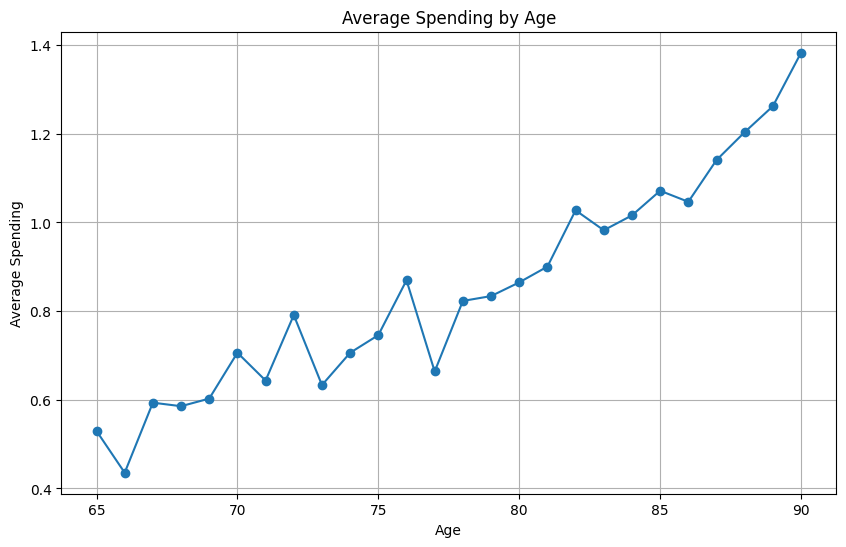

In [124]:
def plot_average_spending_by_age(simulated_data):
    average_spending_by_age = simulated_data.groupby('AGE')['SPEND_SS'].mean()
    plt.figure(figsize=(10, 6))
    average_spending_by_age.plot(kind='line', marker='o')
    plt.title('Average Spending by Age')
    plt.xlabel('Age')
    plt.ylabel('Average Spending')
    plt.grid(True)
    plt.show()

# Example usage with the simulated data
plot_average_spending_by_age(simulated_data_final)